# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Mentoría 16 - ¿Cómo identificar fuga de ventas? Inteligencia artificial aplicada al sector comercial.


---
## Librerías y dataset

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Funciones propias
from tp3_utils_cluster import *
%load_ext autoreload
%autoreload 2

# Clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA

# Preferencias
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',150)
sns.set_context('talk')
sns.set_theme(style='white')

### Clustering con DBSCAN para todos los rubros

In [2]:
sr10_knn_pca = pd.read_csv('../data/interim/tp3_sr10_knn5_pca12.csv')

In [4]:
sr10_knn_pca.head()

,ID,Subrubro,Modelo,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,47,Com. Varios,0,0.024157,0.085663,0.112791,0.638456,0.529641,0.177086,0.292179,0.169751,0.213063,0.054239,0.066772,0.048243
1,48,Com. Varios,0,0.024779,0.074898,0.100222,0.610905,0.529641,0.113269,0.295353,0.172279,0.154298,0.069687,0.022208,0.059349
2,53,Com. Varios,0,0.055998,0.085678,0.150325,0.621437,0.542959,0.119091,0.144486,0.053484,0.148443,0.056520,0.194009,0.105797
3,65,Com. Varios,0,0.018791,0.096209,0.140642,0.640455,0.568752,0.121955,0.183837,0.139717,0.125105,0.033843,0.050249,0.060159
4,66,Com. Varios,0,0.037439,0.139958,0.123521,0.617438,0.519357,0.100186,0.184210,0.220576,0.222917,0.045600,0.057636,0.056142


Aplicar método del codo para definir el epsilon adecuado a cada subrurbo


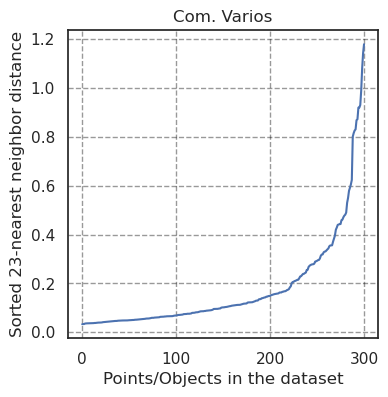

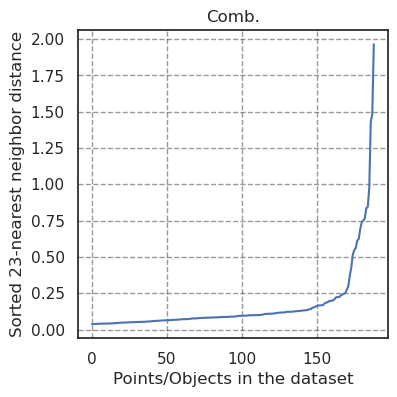

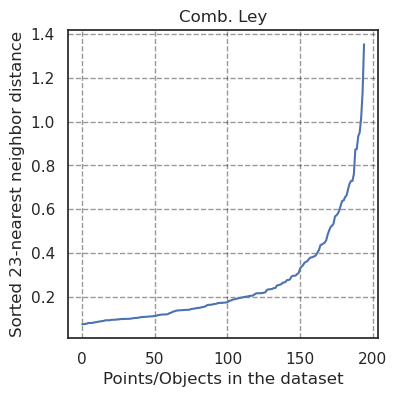

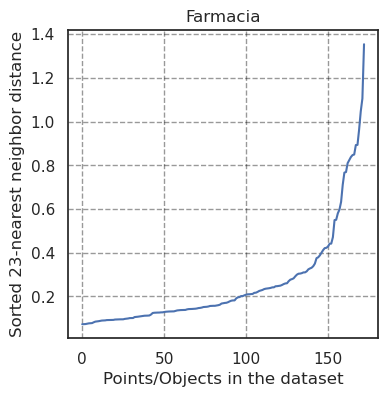

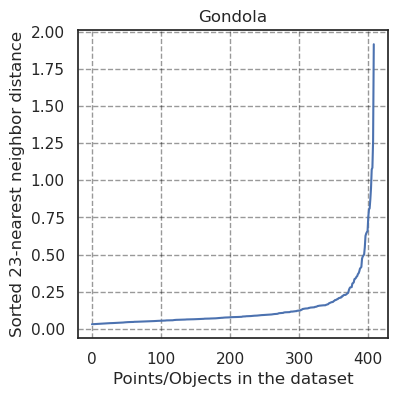

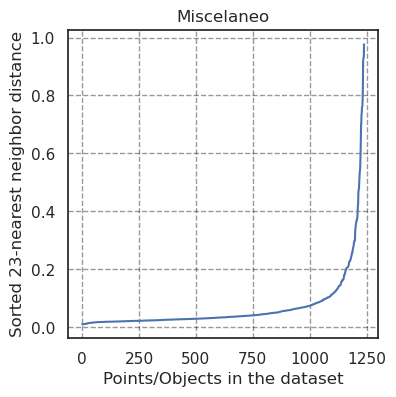

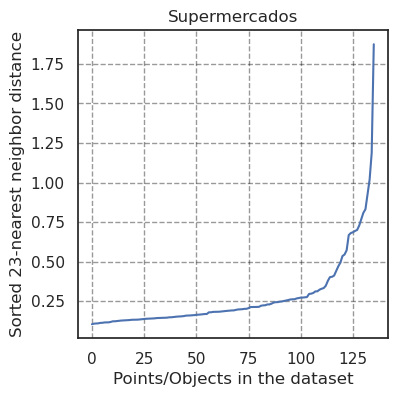

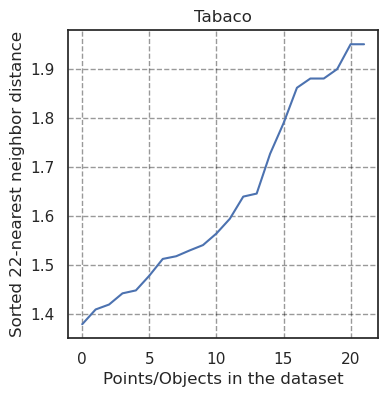

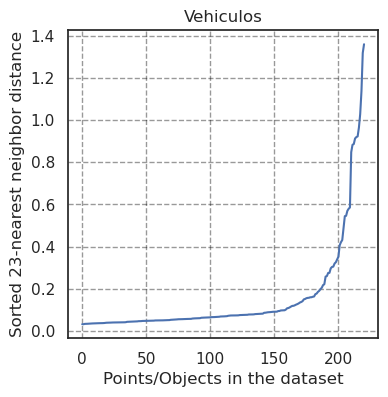

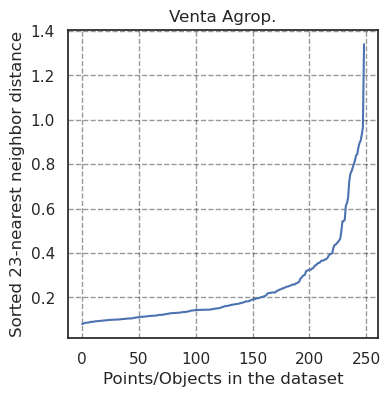

In [37]:
for sr in sr10_knn_pca.Subrubro.unique():
    
    # Dataset por subrubro
    categ = sr10_knn_pca[sr10_knn_pca['Subrubro'] == sr].iloc[:, :3].copy()
    categ.reset_index(inplace=True)
    tp3sr = sr10_knn_pca[sr10_knn_pca['Subrubro'] == sr].iloc[:, 3:].copy()

    k_ideal = 2 * tp3sr.shape[-1] - 1 # k=2*{dim(dataset)} - 1

    if tp3sr.shape[0] >= k_ideal:
        k = k_ideal
    else:
        k = tp3sr.shape[0]

    nbrs = NearestNeighbors(n_neighbors=k, radius=1.0).fit(tp3sr)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(tp3sr) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    figsize_side = 4
    
    plt.figure(figsize=(figsize_side,figsize_side))
    plt.plot(distances)
    plt.title(sr)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


Crear diccionario con los epsilons más adecuados para cada subrubro

In [11]:
from pprint import pprint

subrubros = sr10_knn_pca.Subrubro.unique().tolist()
epsilons = [0.3, 0.25, 0.4, 0.4, 0.25, 0.15, 0.35, 1.6, 0.3, 0.4]

epsilons_dict = dict(zip(subrubros, epsilons))
pprint(epsilons_dict)

{'Com. Varios': 0.3,
 'Comb.': 0.25,
 'Comb. Ley': 0.4,
 'Farmacia': 0.4,
 'Gondola': 0.25,
 'Miscelaneo': 0.15,
 'Supermercados': 0.35,
 'Tabaco': 1.6,
 'Vehiculos': 0.3,
 'Venta Agrop.': 0.4}


epsilon: 0.3
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 29
 0    272
-1     29
Name: count, dtype: int64
[ 18  23  27  30  62 104 122 126 128 131 135 137 149 155 157 163 170 174
 184 196 213 220 221 238 249 268 275 291 295]


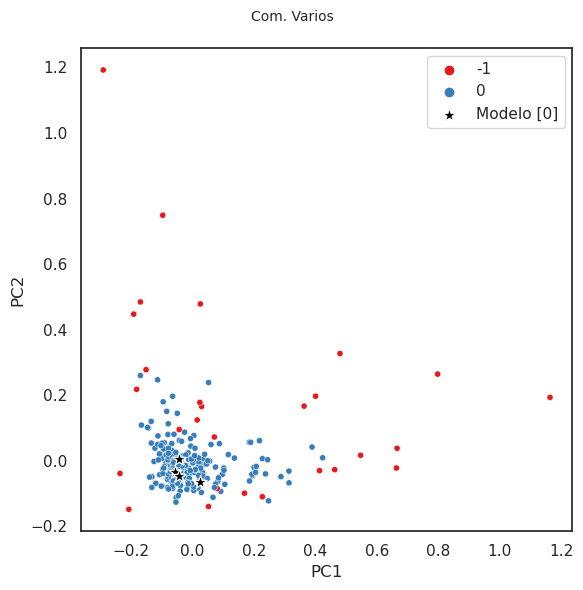

epsilon: 0.25
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 15
 0    174
-1     15
Name: count, dtype: int64
[  4   9  15  24  34  39  50  54 104 119 132 149 151 177 179]


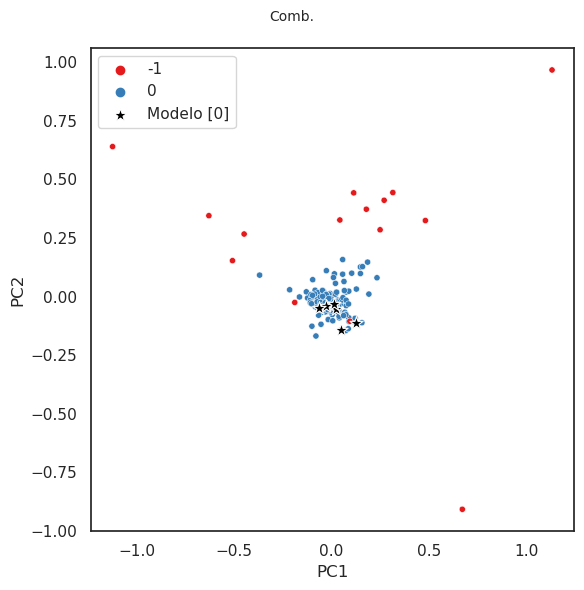

epsilon: 0.4
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 21
 0    174
-1     21
Name: count, dtype: int64
[  1  32  36  48  74 101 102 105 106 109 112 126 136 161 162 163 168 169
 174 178 194]


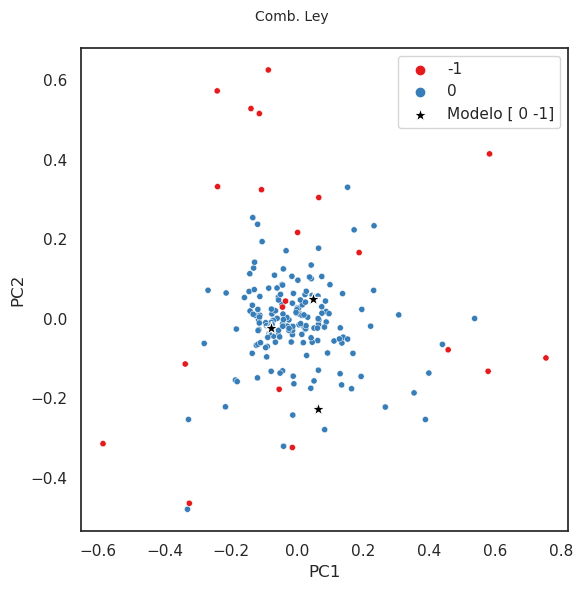

epsilon: 0.4
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 16
 0    157
-1     16
Name: count, dtype: int64
[ 10  39  44  47  55  69  74  78 113 116 118 121 124 126 128 129]


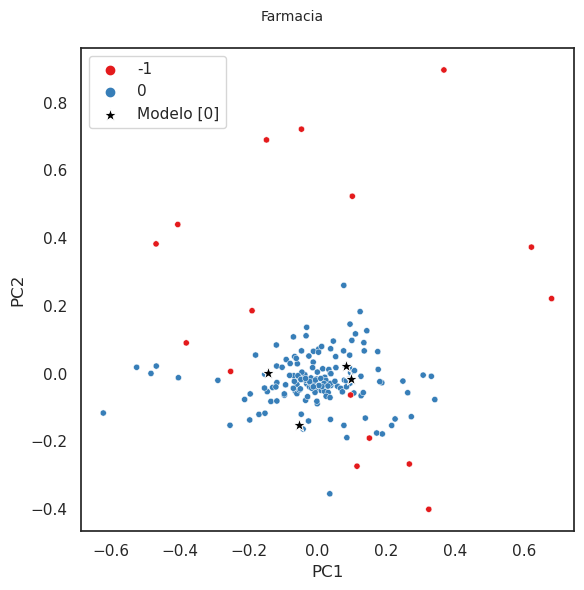

epsilon: 0.25
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 22
 0    387
-1     22
Name: count, dtype: int64
[ 25  31  36  38  48  70 109 187 220 221 223 245 261 309 328 331 341 367
 380 390 394 401]


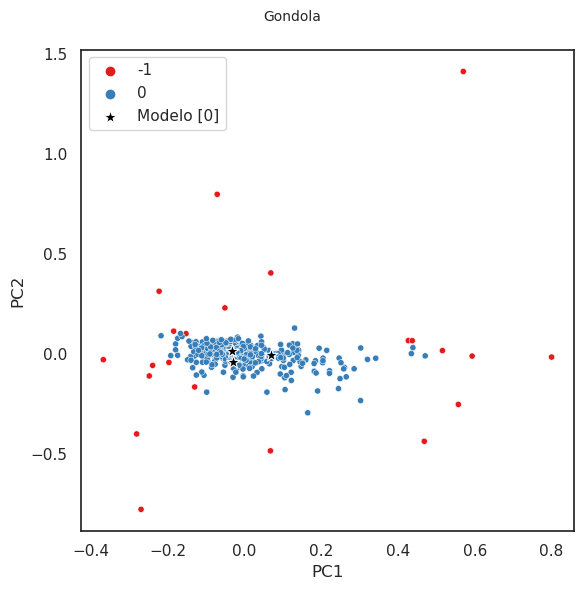

epsilon: 0.15
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 70
 0    1170
-1      70
Name: count, dtype: int64
[  15   85  113  119  130  142  182  185  196  222  242  259  284  286
  348  351  358  368  385  409  410  472  490  495  500  501  503  515
  522  539  543  544  598  621  628  645  679  756  774  776  778  786
  795  804  807  808  819  853  859  891  941  957  961  964 1026 1035
 1036 1048 1060 1072 1099 1107 1158 1161 1164 1184 1194 1207 1209 1217]


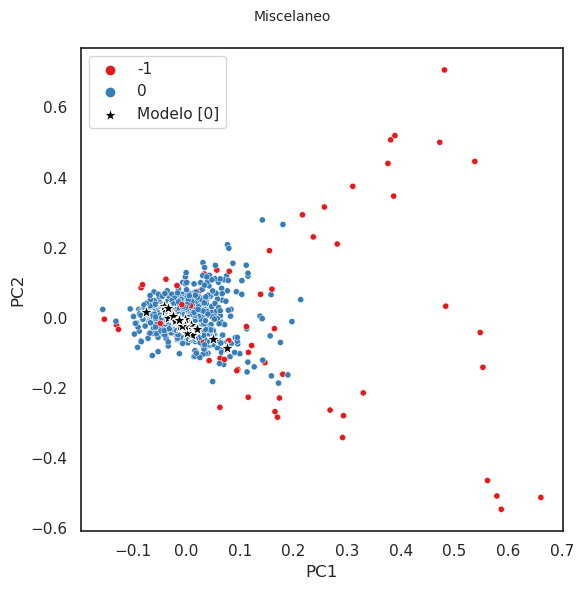

epsilon: 0.35
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 18
 0    118
-1     18
Name: count, dtype: int64
[  4   9  19  21  44  60  80  89  90  94 106 107 108 117 123 125 127 133]


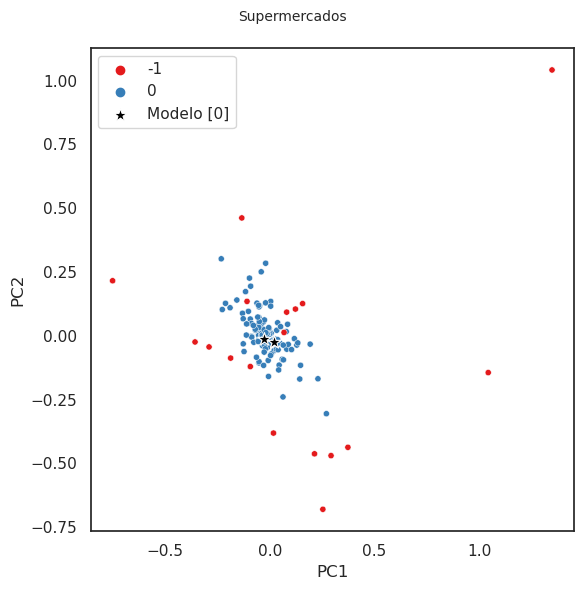

epsilon: 1.6
min_samples: 22
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 0
0    22
Name: count, dtype: int64
[]


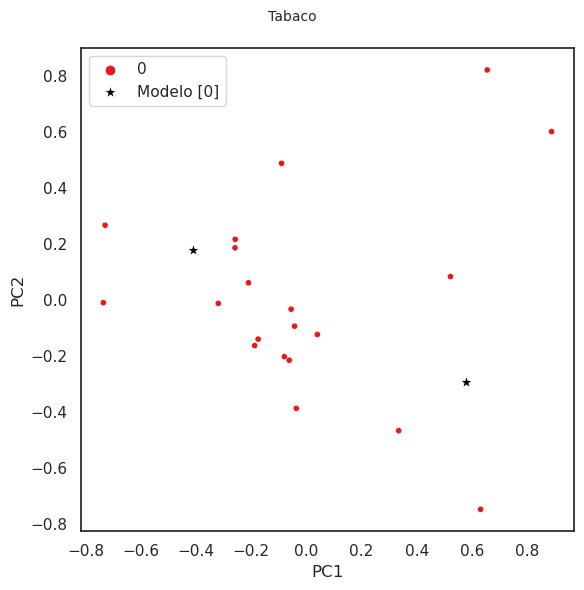

epsilon: 0.3
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 18
 0    203
-1     18
Name: count, dtype: int64
[ 10  13  25  40  67  71  94  95 103 105 154 165 173 182 185 198 204 214]


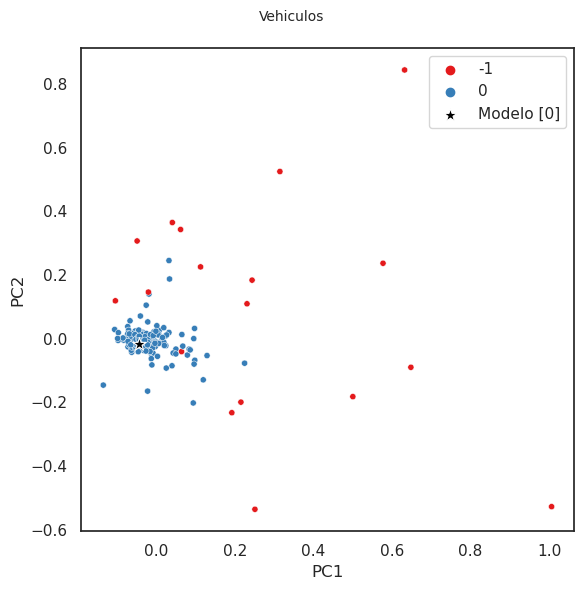

epsilon: 0.4
min_samples: 23
Cantidad de clusters estimado: 1
Cantidad de puntos fuera de un cluster: 17
 0    232
-1     17
Name: count, dtype: int64
[ 34  41  54  66  69  70  87  94 103 112 136 163 167 220 223 227 228]


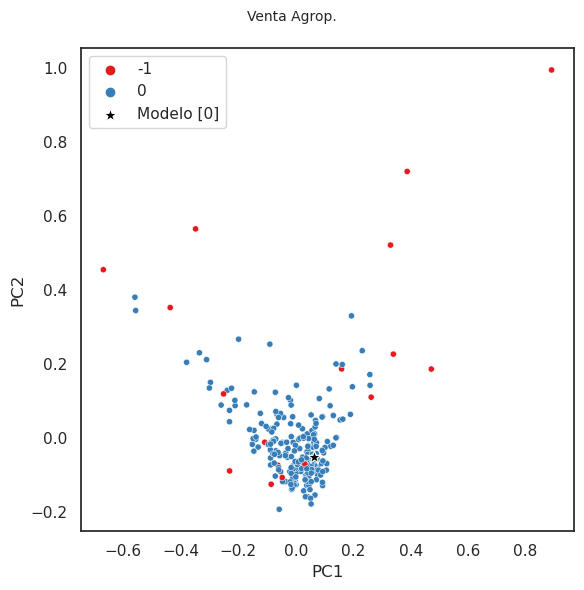

In [64]:
from sklearn.cluster import DBSCAN

outliers_df_list = []

for sr in sr10_knn_pca.Subrubro.unique():
    # Dataset por subrubro
    categ = sr10_knn_pca[sr10_knn_pca['Subrubro'] == sr].iloc[:, :3].copy()
    categ.reset_index(inplace=True)
    tp3sr = sr10_knn_pca[sr10_knn_pca['Subrubro'] == sr].iloc[:, 3:].copy()

    # DBSCAN
    #min_samples_ideal = 2 * tp3sr.shape[-1] - 1 # k=2*{dim(dataset)} - 1
    min_samples_ideal = 2 * tp3sr.shape[1] - 1

    if tp3sr.shape[0] >= min_samples_ideal:
        min_samples = min_samples_ideal
    else:
        min_samples = tp3sr.shape[0]

    dbscan = DBSCAN(eps=epsilons_dict[sr], min_samples=min_samples)
    dbscan.fit(tp3sr)

    labels = dbscan.labels_
    
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print(f"epsilon: {epsilons_dict[sr]}")
    print(f"min_samples: {min_samples}")

    print("Cantidad de clusters estimado: %d" % n_clusters_)
    print("Cantidad de puntos fuera de un cluster: %d" % n_noise_)

    print(pd.DataFrame(dbscan.labels_).value_counts())
    
    print(np.where(dbscan.labels_ == -1)[0])
    
    ### agregar dataframe
    idx_outliers = np.where(dbscan.labels_ == -1)[0]
    #sr10_knn_pca_subrubro = sr10_knn_pca[sr10_knn_pca['Subrubro'] == sr].copy()
    #sr10_knn_pca_subrubro = sr10_knn_pca_subrubro.reset_index().drop(["index"], axis=1)
    
    #df_outliers_loop = sr10_knn_pca_subrubro[sr10_knn_pca_subrubro.index.isin(idx_outliers)]
    df_outliers_loop = categ[categ.index.isin(idx_outliers)]
    
    outliers_df_list.append(df_outliers_loop)
    
    #df_outliers = pd.concat([df_outliers, df_outliers_loop], ignore_index=False)
    #print(f"longitud de df_outliers: {df_outliers.shape[0]}")

    # PCA de 2 componentes para visualizar
    pca2 = PCA(n_components=2)
    subrubro_df_pca_2 = pca2.fit_transform(tp3sr)
    subrubro_df_clusters = pd.DataFrame(data=subrubro_df_pca_2, columns=[f'PC{i}' for i in range(1, 3)])
    subrubro_df_clusters['dbscan_labels'] = dbscan.labels_
    subrubro_df_clusters = pd.concat([categ, subrubro_df_clusters], axis=1)

    # Gráfico
    fig, axs = plt.subplots(figsize=(6, 6))
    fig.suptitle(f"{sr}", fontsize=10)
    sns.scatterplot(data=subrubro_df_clusters, x='PC1', y='PC2', hue='dbscan_labels', palette='Set1', s=20, ax=axs)
    filt_modelo_1 = subrubro_df_clusters['Modelo'] == 1
    modclus = subrubro_df_clusters[filt_modelo_1]["dbscan_labels"].unique()
    sns.scatterplot(data=subrubro_df_clusters[filt_modelo_1], x='PC1', y='PC2', color='black', s=100, label=f'Modelo {modclus}', ax=axs, marker='*')
    axs.legend()

    plt.tight_layout()
    plt.savefig(f'../reports/figures/tp3_dbscan_{sr}.png')
    plt.show()
    
df_outliers = pd.concat(outliers_df_list, ignore_index=True)
df_outliers = df_outliers.reset_index(drop=True).drop(["index"], axis=1)


In [53]:
len(outliers_df_list)

10

In [61]:
df_outliers

,ID,Subrubro,Modelo
0,141,Com. Varios,0
1,233,Com. Varios,0
2,324,Com. Varios,0
3,373,Com. Varios,0
4,735,Com. Varios,0
...,...,...,...
221,2147,Venta Agrop.,0
222,2605,Venta Agrop.,0
223,2661,Venta Agrop.,0
224,2716,Venta Agrop.,0


In [60]:
df_outliers.to_csv("../data/interim/tp3_outliers_dbscan.csv")